<a href="https://colab.research.google.com/github/Toadoum/test-live-coding/blob/master/Sakayo_Toadoum_Sari_LogRegression_students_version_OK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

# Logistic Regression Implementation

# Instructions:
1. Save a copy of this notebook in your drive;
2. Name it by: `Your_fullname_LogRegression.ipynb`
3. Close the original notebook
4. Start typing your codes.

`Note:` Discuss with your neighbors.

# Part 1: Data preparation

## Import Dataset Libraries

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Question 0: Import the dataset Dataset

In [181]:
##### WRITE YOUR CODE HERE #####

data= pd.read_csv('/content/diabetes.csv')
#### END CODE ####

Question 1: Print the first five rows of the Dataset

In [182]:
##### WRITE YOUR CODE HERE #####
data.head(5)
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Question 2: Check the types of your variables/features

In [183]:
##### WRITE YOUR CODE HERE #####
type(data.columns)
#### END CODE ####

pandas.core.indexes.base.Index

Question 3: Describe your dataset

In [184]:
##### WRITE YOUR CODE HERE #####
data.describe()
#### END CODE ####

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Question 4: write a function that scale your features.
`Hint:` $x'= \dfrac{x-\mu}{\sigma}$ 
where $\mu$ is the mean and $\sigma$ the standard deviation of $x$.

In [185]:
##### WRITE YOUR CODE HERE #####
def feature_standard(data):
  ######## write your code #########
  dmean=np.mean(data, axis=0)
  dstd= np.mean(data, axis=0)
  data_Scaled= (data - dmean)/dstd


  return data_Scaled

#### END CODE ####

Question 5: Scale your features, except the target. 

In [186]:
##### WRITE YOUR CODE HERE #####
Standard_data=feature_standard(data)
data.iloc[:, 0:-1]=Standard_data.iloc[:, 0:-1]
data.head()

#### END CODE #### 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.560447,0.224208,0.041886,0.704286,-1.000000,0.050244,0.328738,0.504172,1
1,-0.739925,-0.296908,-0.044938,0.412123,-1.000000,-0.168557,-0.256161,-0.067414,0
2,1.080596,0.513716,-0.073879,-1.000000,-1.000000,-0.271706,0.424102,-0.037330,1
3,-0.739925,-0.263821,-0.044938,0.119959,0.177953,-0.121671,-0.646094,-0.368248,0
4,-1.000000,0.133219,-0.421175,0.704286,1.105277,0.347187,3.848728,-0.007247,1


Question 6: Write a function that split your (x,y) to (x_train, y_train) and (x_test, y_test).
`Note:` This function must return an arrays.

In [187]:
##### WRITE YOUR CODE HERE #####
def split_data(df, train_percent= 0.8):
  np.random.seed(2)
  perm = np.random.permutation(df.index)

  n= len(df)
  train_index = int(train_percent * n)

  train = df.iloc[perm[:train_index]]
  test = df.iloc[perm[train_index:]]

  x_train, x_test, y_train, y_test= train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
#### END CODE ####

In [188]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

# Part 2: Logistic Regression without Regularization.

## Recaps:
1. Logistic/sigmoid function of $z$:
\begin{equation}
g(z)= \dfrac{1}{1+ exp(-z)}
\end{equation}
where $z= x^t \theta$ and $x, y \in \mathbb{R}^d$.
2. Derivative of Logistic/sigmoid function with respective to $z$:
\begin{equation}
dg(z)= g(z)(1-g(z))
\end{equation}
3. Cross-entropy loss:
\begin{equation}
l(\theta)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}
where $y_{true}= g(z)$, $z= x^t \theta$ and $y_{true}$ is the ground-truth for a given $x$.

4. Derivative of Cross-entropy loss with respective to $\theta$:
\begin{equation}
dl(\theta)= -\sum_{i= 1}^{N} x^t\left(y_{true} -y_{ped} \right)
\end{equation}
5. Apply Batch gradient descent to update $\theta$.

Question: Create a class called LogReg. See the description in the below cells.


In [189]:
from numpy.ma.core import reshape
class logistic_regression:
  def __init__(self, num_iters= 100, threshold= 0.5, tolerance= 1e-10, lr= 0.00001):
    ##### WRITE YOUR CODE HERE #####
    self.num_iters=num_iters
    self.threshold=threshold
    self.lr=lr
    self.tolerance=tolerance
    self.theta=None

    self.cost_history=[]
    self.cost_history_test=[]
    #### END CODE ####

  def add_ones(self, x):
    ##### WRITE YOUR CODE HERE #####
    x_new=np.hstack([np.ones((x.shape[0], 1)), x])
    return x_new
    #### END CODE ####

  def sigmoid(self, x):
    ##### WRITE YOUR CODE HERE #####
    h= x@self.theta
    #print(z)
    return 1/(1+np.exp(-h))
    #### END CODE ####

  def cross_entropy(self, x, y_true):
    ##### WRITE YOUR CODE HERE #####
    n = len(x) # Length of x
    y_pred = self.sigmoid(x)
    Cost = -((y_true.T@np.log(y_pred))+(1-y_true.T)@np.log(1-y_pred))/n    
    return Cost[0]
    #### END CODE ####

  def fit(self, x,y):
    ##### WRITE YOUR CODE HERE #####
    x= self.add_ones(x) # Add ones to x
    # y= y.reshape(-1,1) # reshape y. This is optional, do it if needed
    self.theta= np.zeros((x.shape[1],1)) # Initialize theta to zeros vector >>> (x.shape[1])
    current_iter= 1
    norm= 1

    while (norm >= self.tolerance and current_iter < self.num_iters):
      theta_old = self.theta.copy() # Get old theta

      # make predictions
      y_pred= self.sigmoid(x)# using sigmoid function 

      # Gradient of cross-entropy
      grad= -x.T@((y.reshape(-1,1) - y_pred.reshape(-1,1)))
      grad= grad.reshape(-1,1) # Reshape, if it is needed

      # update rules
      theta_new= theta_old-self.lr*grad
      self.theta=theta_new
      # Compute the training loss
      self.cost_history.append(self.cross_entropy(x, y))
      self.cost_history_test.append(self.cross_entropy(self.add_ones(x_test), y_test))

      # Convergence criteria:
      if current_iter%100 == 0:
        print(f'cost for {current_iter} iteration : {self.cross_entropy(x, y)}')
      norm = np.linalg.norm(theta_old - self.theta)
      current_iter += 1
    #### END CODE ####
  
  def predict(self, x):
    #x= self.add_ones(x)
    proba= self.predict_proba(x)# Get probability of x
    result= [1 if i > self.threshold else 0 for i in proba]  # Convert proba to 0 or 1. hint: list comprehension
    return np.array(result)
  
    
  def predict_proba(self, x):
      x= self.add_ones(x)
      y_pred= self.sigmoid(x) # Apply add ones to x
  #    y_pred_prob= None # Predict proba with sigmoid
      return y_pred
  
  def plot(self):
    ##### WRITE YOUR CODE HERE #####
    plt.plot(self.cost_history, label='Train Loss')
    plt.plot(self.cost_history_test, label='Test loss')
    plt.show()

In [190]:
# Create a model by instanciating the class logistic_regression
model = logistic_regression(num_iters=10000)

In [191]:
%%time
model.fit(x_train, y_train)

cost for 100 iteration : 0.6686532145047565
cost for 200 iteration : 0.6502644794444411
cost for 300 iteration : 0.6361517358102915
cost for 400 iteration : 0.6250976148453073
cost for 500 iteration : 0.6162735903851706
cost for 600 iteration : 0.6091030755091169
cost for 700 iteration : 0.6031766945314971
cost for 800 iteration : 0.5981987042531384
cost for 900 iteration : 0.5939522480471198
cost for 1000 iteration : 0.590276258776537
cost for 1100 iteration : 0.5870497557844446
cost for 1200 iteration : 0.5841809565715808
cost for 1300 iteration : 0.5815995980443037
cost for 1400 iteration : 0.5792514421604834
cost for 1500 iteration : 0.5770942951436654
cost for 1600 iteration : 0.5750950916970562
cost for 1700 iteration : 0.5732277385618256
cost for 1800 iteration : 0.5714715057391516
cost for 1900 iteration : 0.5698098167190297
cost for 2000 iteration : 0.5682293320510341
cost for 2100 iteration : 0.5667192503526959
cost for 2200 iteration : 0.5652707717147244
cost for 2300 iterat

In [192]:
pred= model.predict(x_test)

In [193]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [194]:
# Predict Proba
print(model.predict_proba(x_test))

[[0.14927135]
 [0.20461841]
 [0.21287321]
 [0.12643831]
 [0.53705437]
 [0.40055667]
 [0.23784774]
 [0.33539222]
 [0.09505825]
 [0.22150039]
 [0.10777402]
 [0.18925104]
 [0.56077357]
 [0.07332652]
 [0.60137573]
 [0.13505202]
 [0.45887571]
 [0.45502553]
 [0.40493007]
 [0.15693007]
 [0.25959515]
 [0.35705561]
 [0.43950162]
 [0.22117424]
 [0.33331633]
 [0.70636724]
 [0.19697712]
 [0.32736298]
 [0.39979093]
 [0.2848739 ]
 [0.10918885]
 [0.77118947]
 [0.1614025 ]
 [0.35171196]
 [0.1692432 ]
 [0.44401948]
 [0.44800693]
 [0.31079807]
 [0.17128631]
 [0.845656  ]
 [0.17865976]
 [0.29988109]
 [0.50872911]
 [0.81482802]
 [0.24251276]
 [0.14616917]
 [0.33971212]
 [0.58589156]
 [0.44548663]
 [0.42937061]
 [0.30593441]
 [0.53898302]
 [0.54669187]
 [0.08611583]
 [0.37496958]
 [0.187352  ]
 [0.31496401]
 [0.63466754]
 [0.27702468]
 [0.81477586]
 [0.7548616 ]
 [0.46733095]
 [0.19298283]
 [0.13174925]
 [0.32431534]
 [0.19686808]
 [0.16953022]
 [0.12353314]
 [0.31122435]
 [0.33006213]
 [0.51298739]
 [0.44

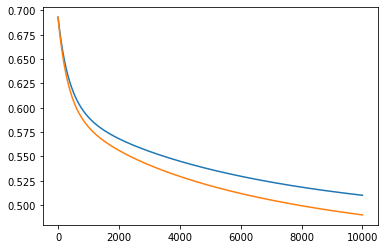

In [195]:
model.plot()

## Push your works to Githup Repo

Setps:
1. Fork the repo: `https://github.com/AMMI-2022/test-live-coding`
2. Clone in your colab;
3. Push
4. Make a pull request

Set your credential

In [196]:
my_token= ""
my_repository= ""
username= ""
useremail= ""

Clone the repo

In [197]:
! git clone https://github.com/{username}/{my_repository}.git

Cloning into 'github.com'...
fatal: could not read Username for 'https://github.com': No such device or address


In [198]:
! git remote -v

fatal: not a git repository (or any of the parent directories): .git


Copy data to test-live-coding folder

In [199]:
!cp diabetes.csv /content/test-live-coding

In [200]:
%cd /content/test-live-coding

[Errno 20] Not a directory: '/content/test-live-coding'
/content


In [201]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [202]:
!git config user.email useremail
!git config user.name username

fatal: not in a git directory
fatal: not in a git directory


In [203]:
!git add .
!git commit -m "Add my files"

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [204]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [205]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


# If you cannot push, use:

In [206]:
!git remote rm origin

fatal: not a git repository (or any of the parent directories): .git


In [207]:
!git remote add origin https://{my_token}@github.com/{username}/{my_repository}.git
!git remote -v

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [208]:
!git push -u origin master --force

fatal: not a git repository (or any of the parent directories): .git


---



---



---

# Assignment

Just follow the class logistic_regression, try to implement Logistic regression with `l1`, `l2` and `l1-l2`. That we call respectively `Lasso (least absolute shrinkage and selection operator)`, `Ridge` and `ElasticNet`.
Given cross-entropy:
\begin{equation}
  l(θ)= -\sum_{i= 1}^{N} \left(y_{true} \times \log y_{pred} + (1-y_{true}) \times \log (1-y_{pred}) \right)
\end{equation}

1. l1-regularization (LASSO):

\begin{equation}
   l(θ) + λ\| \theta\|_1
\end{equation}


2. l2-regularization (Ridge):
\begin{equation}
   l(θ)+ λ\| \theta\|_2
\end{equation}

3. l1-l2-regularization (ElasticNet):
\begin{equation}
  l(θ) + λ_1\| \theta\|_1 + λ_2\| \theta\|_2
\end{equation}

`Note: please use mini-batch as learning algorithm`

In [209]:
class logistic_regression_l1:
  pass

In [210]:
class logistic_regression_l2:
  pass

In [211]:
class logistic_regression_l1_l2:
  pass

# Concepts [Assignment]:
1. Why there is no close form for cross-entropy loss?
2. Why we need cross-entropy loss instead of mse?
3. Why is logistic regression a type of classification technique and not a regression?